In [30]:
import nibabel as nib 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import matplotlib.colors as mcolors

In [3]:
#load real images 
b50f = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/hard/ct_masked/205803.nii.gz").get_fdata()
b30f = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/soft/ct_masked/106068.nii.gz").get_fdata()
bone = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/hard/ct/125287.nii.gz").get_fdata()
std = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/soft/ct/122916.nii.gz").get_fdata()

b50fx,b50y,b50z = b50f.shape
b30fx,b30y,b30z = b30f.shape
bonex,boney,bonez = bone.shape
stdx,stdy,stdz = std.shape

In [4]:
#CycleGAN model 
b50f_cycle = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/B50ftoB30f/205803.nii.gz").get_fdata()
bonetob30f = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoB30f/125287.nii.gz").get_fdata()
stdtob30f = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/STDtoB30f/122916.nii.gz").get_fdata()

b50f_cycle_x,b50f_cycle_y,b50f_cycle_z = b50f_cycle.shape
bonetob30f_x,bonetob30f_y,bonetob30f_z = bonetob30f.shape
stdtob30f_x,stdtob30f_y,stdtob30f_z = stdtob30f.shape

In [5]:
#siwthcable cycleGAN model 
b50f_switch = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/B50ftoB30f/205803.nii.gz").get_fdata()
bonetob30f_switch = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoB30f/125287.nii.gz").get_fdata()
stdtob30f_switch = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/STDtoB30f/122916.nii.gz").get_fdata()

b50f_switch_x,b50f_switch_y,b50f_switch_z = b50f_switch.shape
bonetob30f_switch_x,bonetob30f_switch_y,bonetob30f_switch_z = bonetob30f_switch.shape
stdtob30f_switch_x,stdtob30f_switch_y,stdtob30f_switch_z = stdtob30f_switch.shape

In [6]:
#multipath cycleGAN model
b50f_multipath = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/B50ftoB30f/205803.nii.gz").get_fdata()
bonetob30f_multipath = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoB30f/125287.nii.gz").get_fdata()
stdtob30f_multipath = nib.load("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/STDtoB30f/122916.nii.gz").get_fdata()

b50f_multipath_x,b50f_multipath_y,b50f_multipath_z = b50f_multipath.shape
bonetob30f_multipath_x,bonetob30f_multipath_y,bonetob30f_multipath_z = bonetob30f_multipath.shape
stdtob30f_multipath_x,stdtob30f_multipath_y,stdtob30f_multipath_z = stdtob30f_multipath.shape

In [7]:
#Multipath with anatomy 
b50f_multipath_anatomy = nib.load("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/B50ftoB30f/205803.nii.gz").get_fdata()
bonetob30f_multipath_anatomy = nib.load("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f/125287.nii.gz").get_fdata()
stdtob30f_multipath_anatomy = nib.load("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f/122916.nii.gz").get_fdata()

b50f_multipath_anatomy_x,b50f_multipath_anatomy_y,b50f_multipath_anatomy_z = b50f_multipath_anatomy.shape
bonetob30f_multipath_anatomy_x,bonetob30f_multipath_anatomy_y,bonetob30f_multipath_anatomy_z = bonetob30f_multipath_anatomy.shape
stdtob30f_multipath_anatomy_x,stdtob30f_multipath_anatomy_y,stdtob30f_multipath_anatomy_z = stdtob30f_multipath_anatomy.shape

In [11]:
#Plot each image 
def plot_CT_image(plane, output_path):
    plt.figure(figsize = (5,5), facecolor="w")
    plt.imshow(plane, cmap = "gray", vmin=-1000, vmax = 0)
    plt.axis('off')
    plt.gcf().set_dpi(300)
#plt.title("Siemens B50f")
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1, dpi=600, format = "tiff")
    print(f"Saved image to {output_path}")
    # plt.show()
    plt.close()

def clip_LAS(img, xyz):
    """Flips the image to the right orientation"""
    x, y , z = xyz
    clip_sag = img[x, :, :]
    clip_sag = np.flip(clip_sag, 0)
    clip_sag = np.rot90(clip_sag)
    clip_cor = img[:, y, :]
    clip_cor = np.rot90(clip_cor)
    clip_ax = img[:, :, z]
    clip_ax = np.rot90(clip_ax)
    return (clip_sag, clip_cor, clip_ax)

def readimage(imagepath):
    img = nib.load(imagepath).get_fdata()
    x,y,z = img.shape
    clip_sag, clip_cor, clip_ax = clip_LAS(img, (x//2, y//2, z//2))
    return clip_ax 

In [12]:
b50f = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/hard/ct_masked/205803.nii.gz")
b30f = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/soft/ct_masked/106068.nii.gz")
bone = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/hard/ct/125287.nii.gz")
std = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/soft/ct/122916.nii.gz")

b50f_cycle = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/B50ftoB30f/205803.nii.gz")
bonetob30f = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoB30f/125287.nii.gz")
stdtob30f = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/STDtoB30f/122916.nii.gz")

b50f_switch = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/B50ftoB30f/205803.nii.gz")
bonetob30f_switch = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoB30f/125287.nii.gz")
stdtob30f_switch = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/STDtoB30f/122916.nii.gz")

b50f_multipath = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/B50ftoB30f/205803.nii.gz")
bonetob30f_multipath = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoB30f/125287.nii.gz")
stdtob30f_multipath = readimage("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/STDtoB30f/122916.nii.gz")

b50f_multipath_anatomy = readimage("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/B50ftoB30f/205803.nii.gz")
bonetob30f_multipath_anatomy = readimage("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f/125287.nii.gz")
stdtob30f_multipath_anatomy = readimage("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f/122916.nii.gz")

In [13]:
plot_CT_image(b50f, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f.tiff")
plot_CT_image(b30f, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b30f.tiff")
plot_CT_image(bone, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bone.tiff")
plot_CT_image(std, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/std.tiff")

plot_CT_image(b50f_cycle, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f_cycleGAN.tiff")
plot_CT_image(bonetob30f, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bonetob30f_cycleGAN.tiff")
plot_CT_image(stdtob30f, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/stdtob30f_cycleGAN.tiff")

plot_CT_image(b50f_switch, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f_switch.tiff")
plot_CT_image(bonetob30f_switch, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bonetob30f_switch.tiff")
plot_CT_image(stdtob30f_switch, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/stdtob30f_switch.tiff")

plot_CT_image(b50f_multipath, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f_multipath.tiff")
plot_CT_image(bonetob30f_multipath, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bonetob30f_multipath.tiff")
plot_CT_image(stdtob30f_multipath, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/stdtob30f_multipath.tiff")

plot_CT_image(b50f_multipath_anatomy, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f_multipath_anatomy.tiff")
plot_CT_image(bonetob30f_multipath_anatomy, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bonetob30f_multipath_anatomy.tiff")
plot_CT_image(stdtob30f_multipath_anatomy, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/stdtob30f_multipath_anatomy.tiff")

Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b30f.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bone.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/std.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/b50f_cycleGAN.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Qualitative/bonetob30f_cycleGAN.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figure

## Method figure for paper 

In [24]:
#Plot each image 
def plot_CT_image(plane, output_path):
    plt.figure(figsize = (5,5), facecolor="w")
    plt.imshow(plane, cmap = "gray", vmin=-150, vmax = 150)
    plt.axis('off')
    plt.gcf().set_dpi(300)
#plt.title("Siemens B50f")
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1, dpi=600, format = "tiff")
    print(f"Saved image to {output_path}")
    # plt.show()
    plt.close()

def clip_LAS(img, xyz):
    """Flips the image to the right orientation"""
    x, y , z = xyz
    clip_sag = img[x, :, :]
    clip_sag = np.flip(clip_sag, 0)
    clip_sag = np.rot90(clip_sag)
    clip_cor = img[:, y, :]
    clip_cor = np.rot90(clip_cor)
    clip_ax = img[:, :, z]
    clip_ax = np.rot90(clip_ax)
    return (clip_sag, clip_cor, clip_ax)

def readimage(imagepath):
    img = nib.load(imagepath).get_fdata()
    x,y,z = img.shape
    clip_sag, clip_cor, clip_ax = clip_LAS(img, (x//2, y//2, z//2))
    return clip_ax 

In [25]:
real_b50f_mask = readimage("/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/siemens_hard_slices/101829_068.nii.gz")
real_b30f_mask = readimage("/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/siemens_soft_slices/101829_068.nii.gz")
real_b50f = readimage("/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/train_siemens_masked_hard/101829_068.nii.gz")
real_b30f = readimage("/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/train_siemens_masked_soft/101829_068.nii.gz") 

In [29]:
plot_CT_image(real_b50f, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Method/real_b50f.tiff")
plot_CT_image(real_b30f, "/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Method/real_b30f.tiff")

Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Method/real_b50f.tiff
Saved image to /valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Method/real_b30f.tiff


In [61]:
real_b50f.shape

(512, 512)

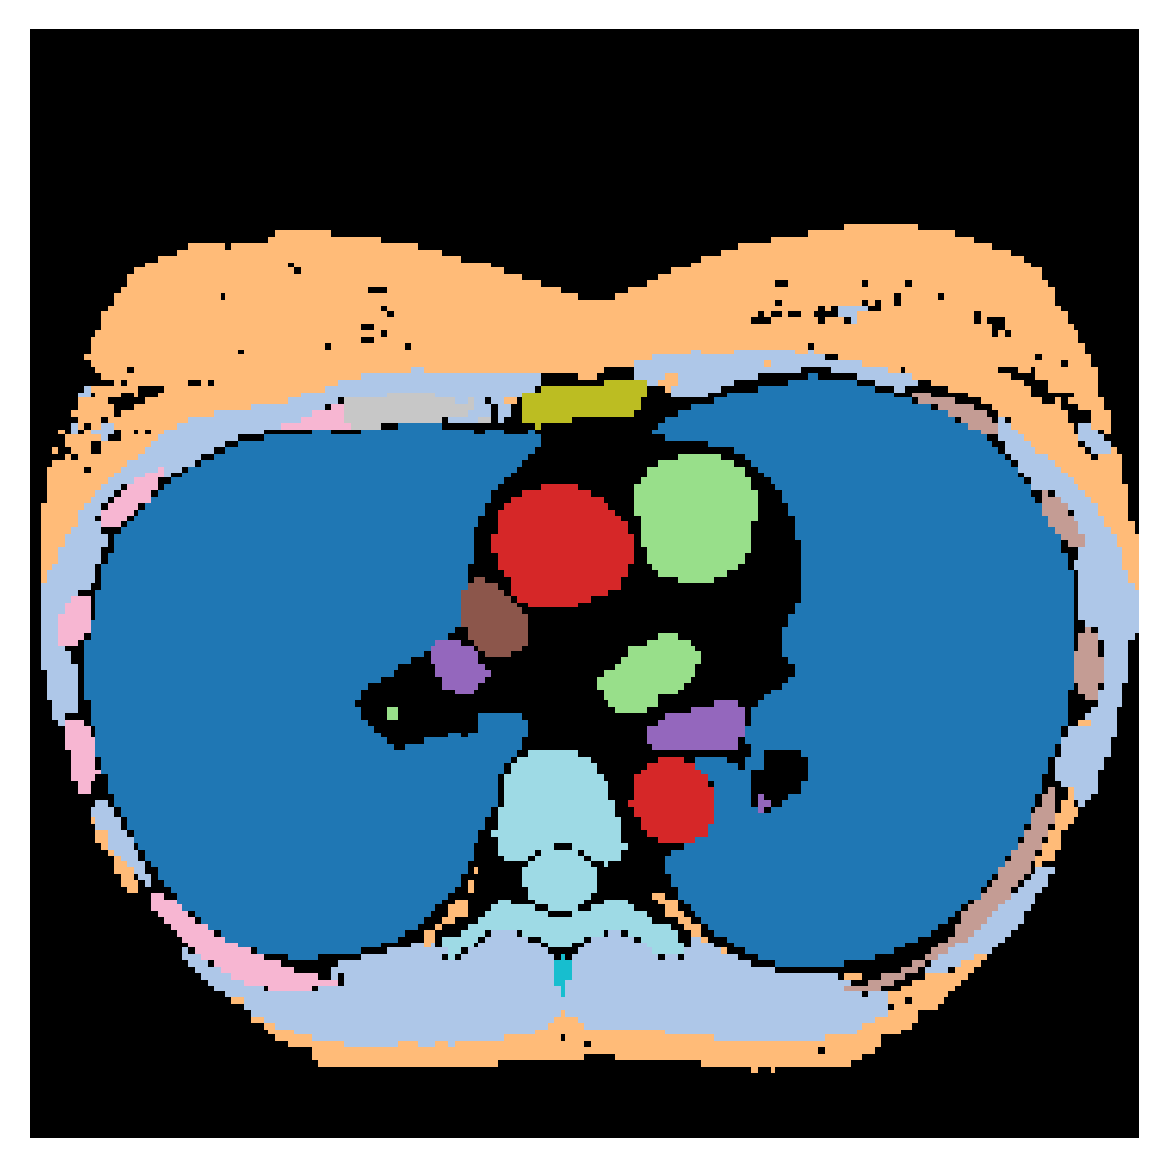

In [67]:
unique_labels = np.unique(real_b50f_mask)
unique_labels = unique_labels[unique_labels != 0]

cmap = plt.cm.get_cmap('tab20', len(unique_labels) -1)  # Use 'tab10' for distinct colors
color_map = {label: cmap(i) for i, label in enumerate(unique_labels) if label != 0}
color_map[0] = (0, 0, 0, 1)


colour_image = np.zeros((*real_b50f_mask.shape, 4))
for label, color in color_map.items():
    colour_image[real_b50f_mask == label] = color

plt.imshow(colour_image)
plt.axis('off')
plt.gcf().set_dpi(300)
plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Method/real_b50f_mask.tiff", bbox_inches='tight', pad_inches=0.1, dpi=300, format = "tiff")

In [ ]:
colour_image_soft  = np.zeros((*real_b30f_mask.shape, 4))
for label, color in color_map.items():
    colour_image_soft[real_b30f_mask == label] = color

plt.imshow(colour_image_soft)
plt.axis('off')
plt.gcf().set_dpi(300)
plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/Method/real_b30f_mask.tiff", bbox_inches='tight', pad_inches=0.1, dpi=300, format = "tiff")